Em um dataset específico de joelhos há um problema: Alguns recortes de joelhos foram recortados de maneira erronea, sendo que, essas imagens não estão com o joelho corretamente centralizado, apresentando a metade do joelho e a outra parte com o fundo da imagem.

Será que é possível adquirir apenas os joelhos corretamente centralizados, realizando a metodologia otsu em conjunto da limiarização binária? Iremos tentar a seguir.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Binarização do joelho

In [2]:
def view_original_gray(img, gray):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

def compare_images(img1, img2):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    
def view(img):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

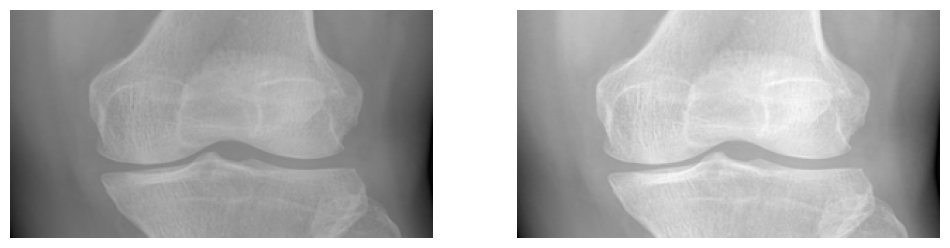

In [3]:
img = cv2.imread('images/knee01.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

view_original_gray(img, img_gray)

In [4]:
img_gray.shape

(162, 300)

Limiar:  130.0


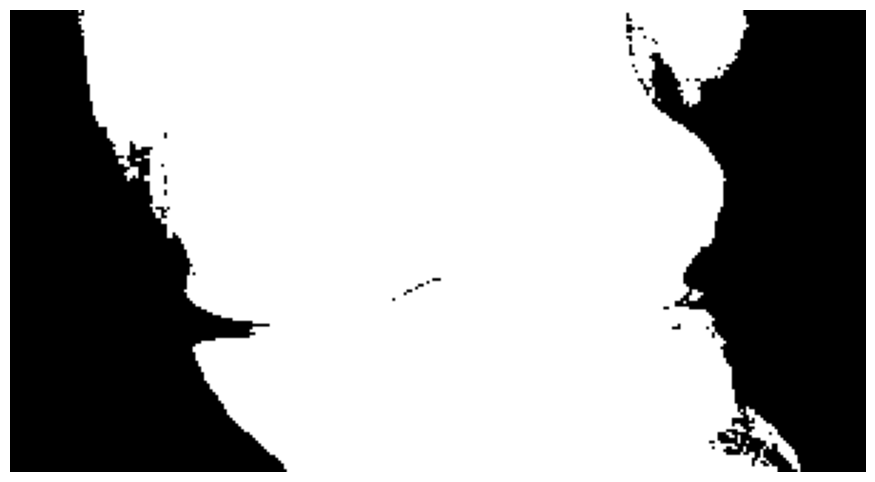

In [5]:
limiar, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Limiar: ', limiar)

view(img_otsu)

(array([ 12.,  25.,   7.,  16.,   0.,  14.,  17.,  19.,   0.,   2.,   5.,
          1.,   0.,   7.,   3.,   5.,   6.,   0.,   4.,   6.,   5.,   0.,
          4.,   7.,   4.,   0.,   3.,   7.,   7.,   3.,   0.,   6.,  15.,
          6.,   0.,   8.,  13.,  10.,   0.,   9.,  15.,  14.,  12.,   0.,
         20.,  21.,  19.,   0.,  18.,  28.,  25.,   0.,  25.,  29.,  40.,
         31.,   0.,  31.,  34.,  44.,   0.,  40.,  40.,  48.,   0.,  54.,
         52.,  48.,  68.,   0.,  55.,  50.,  60.,   0.,  64.,  57.,  59.,
          0.,  70.,  73.,  57.,  69.,   0.,  70.,  71.,  73.,   0.,  69.,
         90.,  77.,   0.,  89.,  84.,  87., 104.,   0.,  85., 116.,  98.,
          0., 111., 107., 117.,   0., 125., 117., 128., 133.,   0., 132.,
        167., 159.,   0., 149., 181., 150.,   0., 179., 136., 206., 150.,
          0., 190., 189., 210.,   0., 217., 220., 245.,   0., 248., 304.,
        271.,   0., 305., 310., 248., 265.,   0., 240., 240., 284.,   0.,
        278., 318., 338.,   0., 374., 

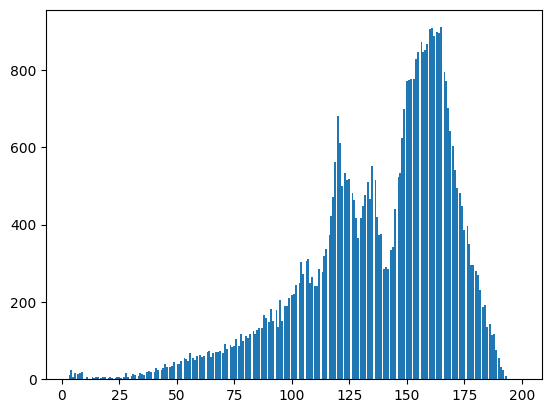

In [6]:
plt.hist(img_gray.ravel(), bins=255)

In [7]:
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)

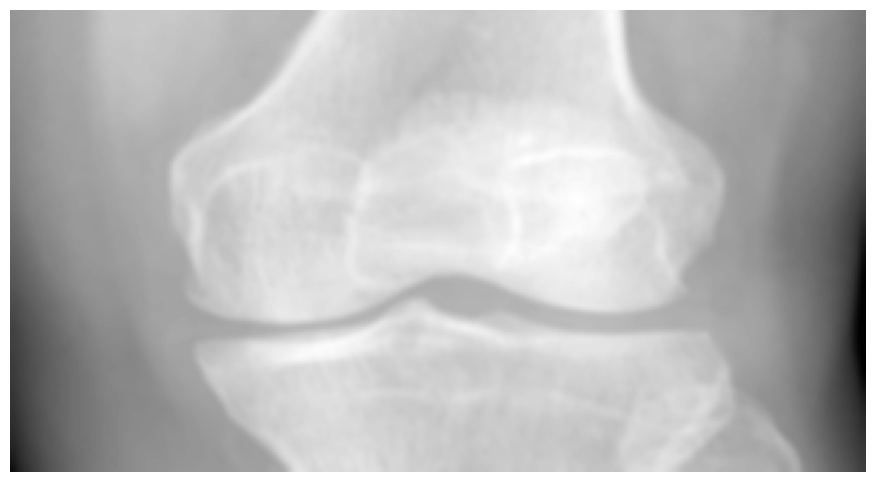

In [8]:
view(img_blur)

Limiar:  130.0


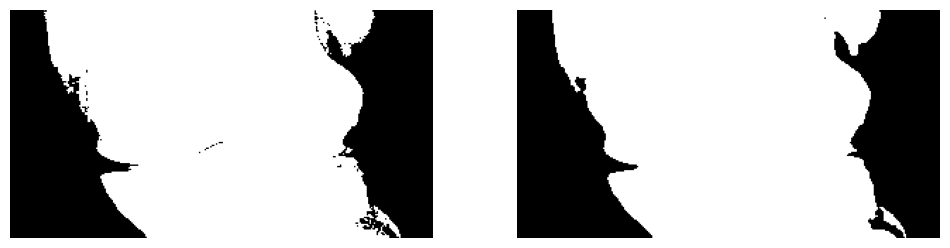

In [9]:
limiar, img_otsu_blur = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Limiar: ', limiar)

compare_images(img_otsu, img_otsu_blur)

(array([   5.,   34.,   18.,    0.,   14.,   10.,    5.,    0.,    7.,
           4.,    0.,    5.,    4.,   13.,    0.,    8.,    7.,    5.,
           0.,    9.,    5.,    0.,    6.,    7.,    6.,    0.,    4.,
          13.,   11.,    0.,   11.,    9.,    0.,    6.,   10.,   12.,
           0.,   13.,   11.,   12.,    0.,   20.,   17.,    0.,   18.,
          19.,   20.,    0.,   23.,   21.,    0.,   30.,   35.,   31.,
           0.,   28.,   29.,   44.,    0.,   40.,   42.,    0.,   44.,
          48.,   51.,    0.,   50.,   52.,   63.,    0.,   56.,   52.,
           0.,   59.,   61.,   61.,    0.,   57.,   67.,   66.,    0.,
          64.,   73.,    0.,   64.,   74.,   77.,    0.,   68.,   97.,
          71.,    0.,   79.,  104.,    0.,   79.,   93.,  105.,    0.,
         103.,   94.,    0.,  122.,   98.,  124.,    0.,  110.,  132.,
         121.,    0.,  135.,  139.,    0.,  143.,  161.,  145.,    0.,
         185.,  161.,  164.,    0.,  170.,  178.,    0.,  174.,  178.,
      

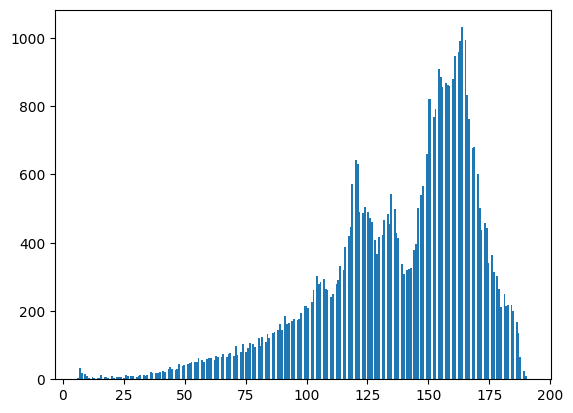

In [10]:
plt.hist(img_blur.ravel(), bins=255)

### Analisando a distribuição dos pixels

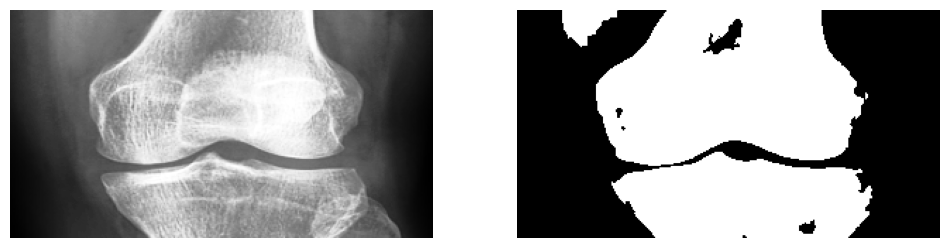

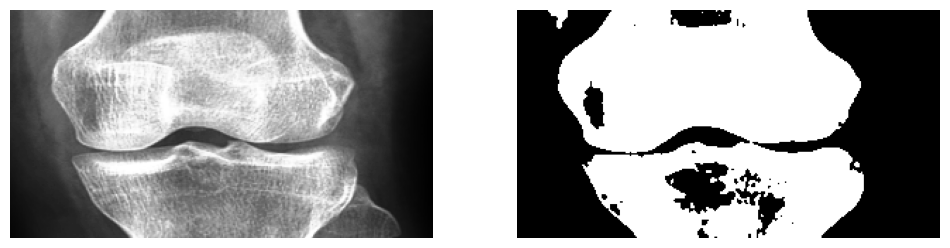

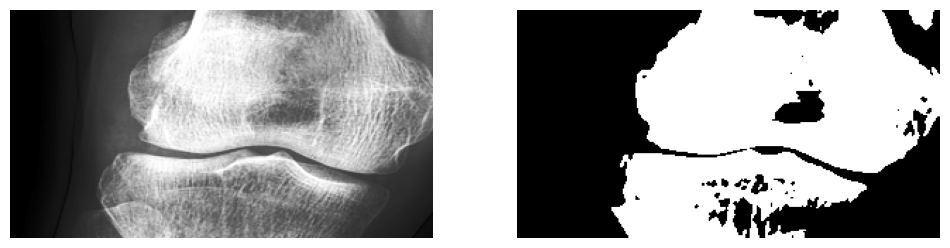

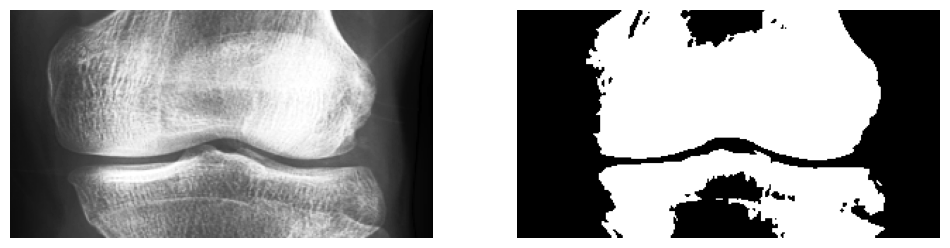

In [11]:
knees_path = ['knee01.png', 'knee02.png', 'knee03.png', 'knee04.png']
knees = []

for knee in knees_path:
    img = cv2.imread(f'images/{knee}')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(img_gray) # Equalização de histograma para melhorar o contraste das imagens
    img_blur = cv2.GaussianBlur(equalized, (5,5), 0)


    limiar, img_otsu_blur = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Metodologia Otsu para encontrar o limiar ideal
    #limiar, img_otsu_blur = cv2.threshold(img_blur, 147, 255, cv2.THRESH_BINARY)
    knees.append(img_otsu_blur)

    compare_images(equalized, img_otsu_blur) # Visualizando imagem equalizada e limiarização binária

In [12]:
knees = np.array(knees)

In [13]:
knees_norm = knees / np.max(knees)

In [14]:
knees_norm.min(), knees_norm.max()

(np.float64(0.0), np.float64(1.0))

In [15]:
len(knees_norm[1])

162

In [16]:
knees_white = [k.sum() for k in knees_norm]
knees_white

[np.float64(25172.0),
 np.float64(25709.0),
 np.float64(25525.0),
 np.float64(25604.0)]

Visualizando a diferença de pixels brancos da primeira imagem e da quarta imagem.

Talvez, a partir desse método seja possível validar se o recorte da imagem realmente esta representando completamente o joelho ou não.

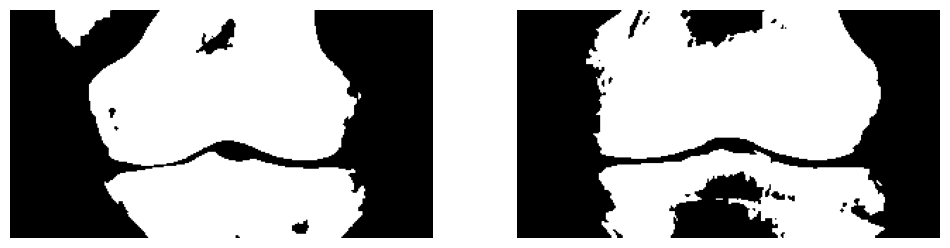

In [17]:
compare_images(knees[0], knees[3])

Quantidade de pixels brancos por imagem.

<BarContainer object of 4 artists>

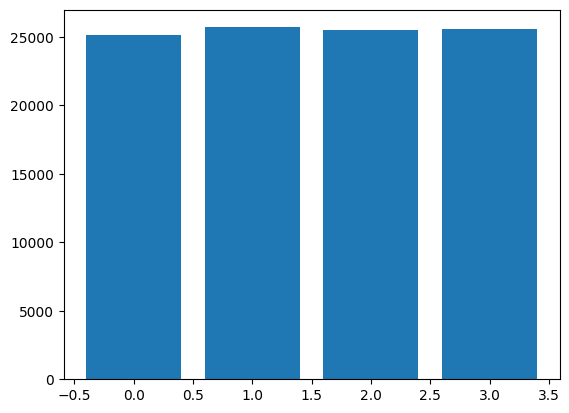

In [18]:
plt.bar(range(0, len(knees_white)), knees_white)